In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [4]:
#Merge Datasets
merged_df = transactions_df.merge(customers_df, on="CustomerID").merge(products_df, on="ProductID")

In [5]:
# Convert date columns to datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

In [6]:
# 1. Check for missing values
print("Missing Values:")
print(merged_df.isnull().sum())

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [7]:
# 2. Summary statistics
print("\nSummary Statistics:")
print(merged_df.describe(include='all'))


Summary Statistics:
       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00001      C0109      P059                            NaN   
freq               1         11        19                            NaN   
mean             NaN        NaN       NaN  2024-06-23 15:33:02.768999936   
min              NaN        NaN       NaN            2023-12-30 15:29:12   
25%              NaN        NaN       NaN     2024-03-25 22:05:34.500000   
50%              NaN        NaN       NaN     2024-06-26 17:21:52.500000   
75%              NaN        NaN       NaN            2024-09-19 14:19:57   
max              NaN        NaN       NaN            2024-12-28 11:00:00   
std              NaN        NaN       NaN                            NaN   

           Quantity   TotalValue     Price_x   CustomerName       

In [8]:
# 3. Top 5 regions by sales
sales_by_region = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nSales by Region:")
print(sales_by_region)


Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [9]:
# 4. Top 5 products by revenue
top_products = merged_df.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Revenue:")
print(top_products)


Top 5 Products by Revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [10]:
# 5. Sales trends over time
transactions_over_time = merged_df.set_index("TransactionDate").resample("M")["TotalValue"].sum()


C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_18732\3582293173.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions_over_time = merged_df.set_index("TransactionDate").resample("M")["TotalValue"].sum()


In [11]:
# 6. Revenue by category
revenue_by_category = merged_df.groupby("Category")["TotalValue"].sum()
print("\nRevenue by Category:")
print(revenue_by_category)


Revenue by Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [12]:
# 7. Average spending per customer
average_spending_per_customer = merged_df.groupby("CustomerID")["TotalValue"].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Average Spending:")
print(average_spending_per_customer)


Top 5 Customers by Average Spending:
CustomerID
C0040    1323.133333
C0089    1278.110000
C0066    1266.426667
C0168    1263.457500
C0196    1245.720000
Name: TotalValue, dtype: float64


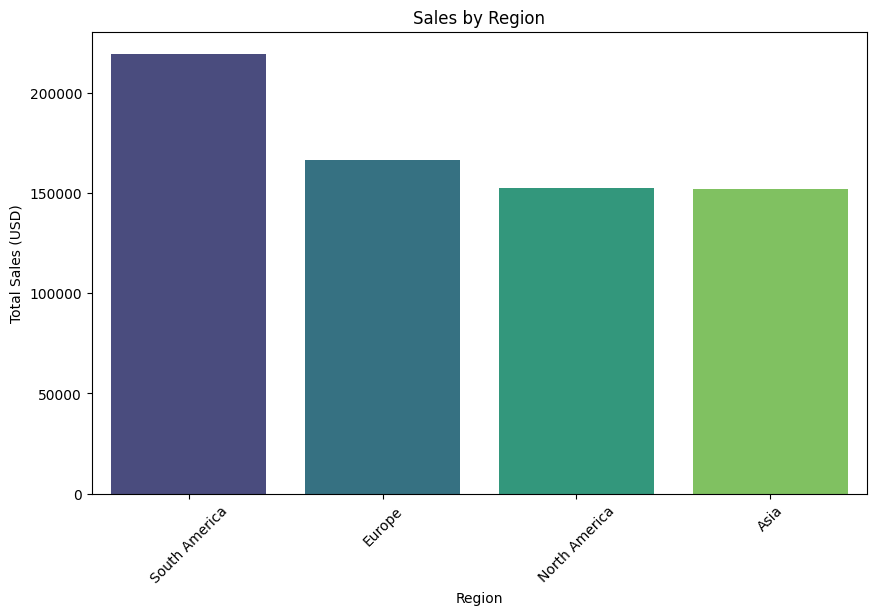

In [13]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")
plt.title("Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

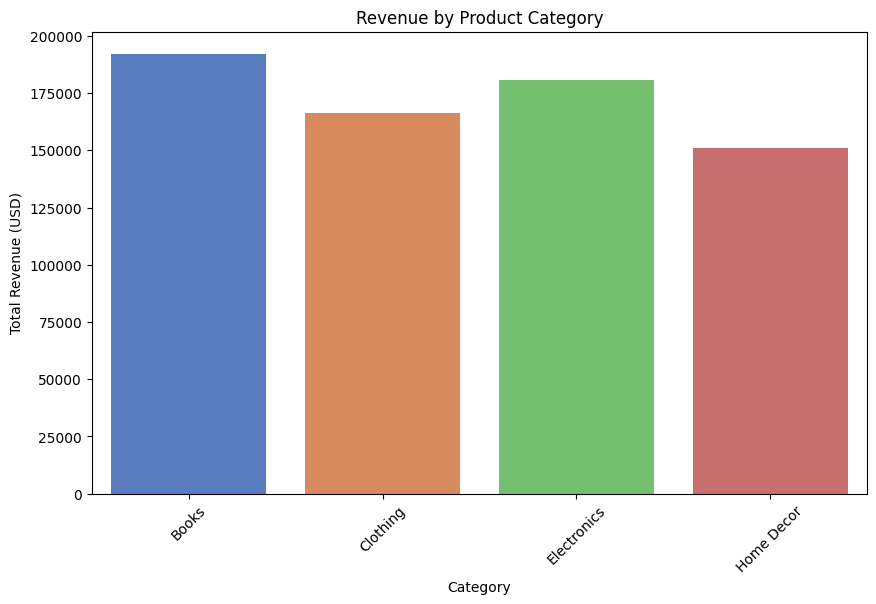

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="muted")
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

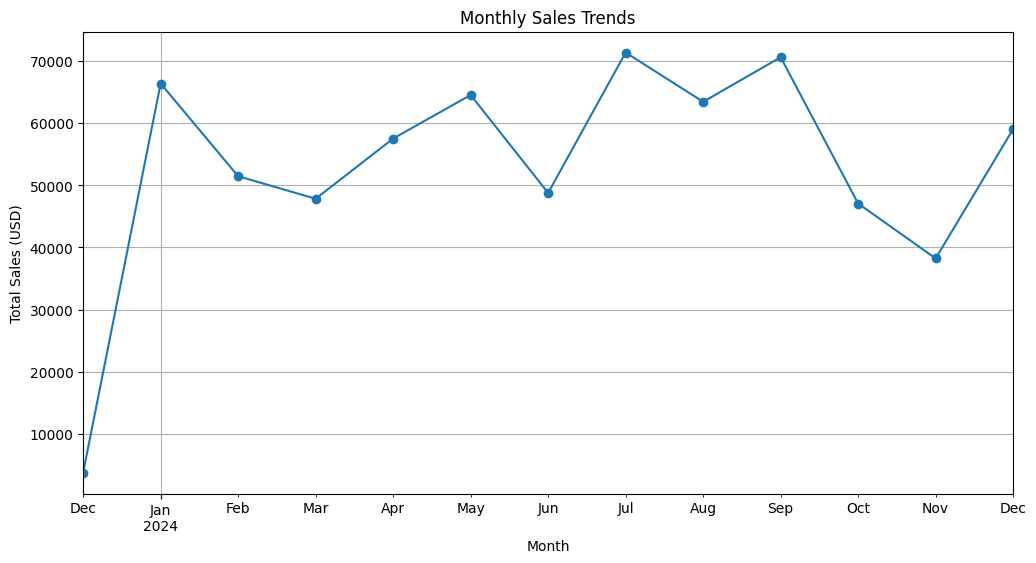

In [15]:
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='line', marker='o', title="Monthly Sales Trends")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


In [16]:
#Top selling products by quantity

top_selling_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Quantity Sold:")
print(top_selling_products)


Top 5 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [17]:
#Customer Retention

merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
retention_df = merged_df.groupby("CustomerID").agg(
    SignupDate=("SignupDate", "min"),
    LastTransactionDate=("TransactionDate", "max")
)
retention_df["RetentionDays"] = (retention_df["LastTransactionDate"] - retention_df["SignupDate"]).dt.days
print("\nCustomer Retention Statistics:")
print(retention_df["RetentionDays"].describe())


Customer Retention Statistics:
count     199.000000
mean      453.658291
std       335.695891
min      -263.000000
25%       170.500000
50%       416.000000
75%       734.500000
max      1061.000000
Name: RetentionDays, dtype: float64


In [18]:
#Region-wise Customer Distribution

customers_by_region = customers_df["Region"].value_counts()
print("\nNumber of Customers by Region:")
print(customers_by_region)


Number of Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [20]:
#Seasonality in Sales

monthly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.month)["TotalValue"].sum()
print("\nMonthly Sales Distribution:")
print(monthly_sales)


Monthly Sales Distribution:
TransactionDate
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


In [25]:
# Calculate profit per transaction
merged_df['Profit'] = (merged_df['Price_x'] - merged_df['Price_y']) * merged_df['Quantity']

# Total profit
total_profit = merged_df['Profit'].sum()

# Profit by product
profit_by_product = merged_df.groupby("ProductName")["Profit"].sum().sort_values(ascending=False)

print("\nTotal Profit from Transactions:")
print(total_profit)

print("\nTop Products by Profit:")
print(profit_by_product.head(5))


Total Profit from Transactions:
0.0

Top Products by Profit:
ProductName
ActiveWear Biography      0.0
SoundWave Jeans           0.0
HomeSense Cookware Set    0.0
HomeSense Desk Lamp       0.0
HomeSense Headphones      0.0
Name: Profit, dtype: float64


In [26]:
#Top revenue generating products
top_revenue_products = merged_df.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("\nTop Revenue-generating Products:")
print(top_revenue_products)


Top Revenue-generating Products:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [27]:
# Calculate total spending for each customer
top_spenders = merged_df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)

# Display the top 5 spenders
print(top_spenders.head(5))

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [28]:
transactions_over_time.head()

TransactionDate
2023-12-31     3769.52
2024-01-31    66376.39
2024-02-29    51459.27
2024-03-31    47828.73
2024-04-30    57519.06
Freq: ME, Name: TotalValue, dtype: float64